In [3]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.axes import Axes
import pandas as pd
import itertools
import os
import pandas as pd

In [4]:
#enter your file names of csv file produced with 
file_path ='/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/data/raw_reads/PacBio'
file_name ='testcsv'
df_all= pd.read_csv(file_path+'/'+file_name)

In [8]:
df_all['Numbering'] = pd.Series(range(0, len(df_all)))

In [5]:
summary_dict = {'total' : df_all['read_length'].sum(),
                'reads' : df_all['read_length'].count(),
                'mean' : df_all['read_length'].mean(), 
                'median' :  df_all['read_length'].median()
                }

In [9]:
print('Summary statistics', '\n')
print('%s'%'*'*80)
print(" {:<30}".format('Total sequence amount:'),"{0[total]:>30e}".format(summary_dict),"\n",
     "{:<30}".format('Number of reads:'),"{0[reads]:>30e}".format(summary_dict), "\n",
    "{:<30}".format('Median read length:'), "{0[median]:>30.0f}".format(summary_dict), "\n",
"{:<30}".format('Mean read length:'), "{0[mean]:>30.0f}".format(summary_dict))

Summary statistics 

********************************************************************************
 Total sequence amount:                           1.370211e+10 
 Number of reads:                                 1.279425e+06 
 Median read length:                                      9652 
 Mean read length:                                       10710


In [10]:
cut_off_2000 = list(df_all['Numbering'][df_all['read_length'] > 2000])[0]
cut_off_5000 = list(df_all['Numbering'][df_all['read_length'] > 5000])[0]

//anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


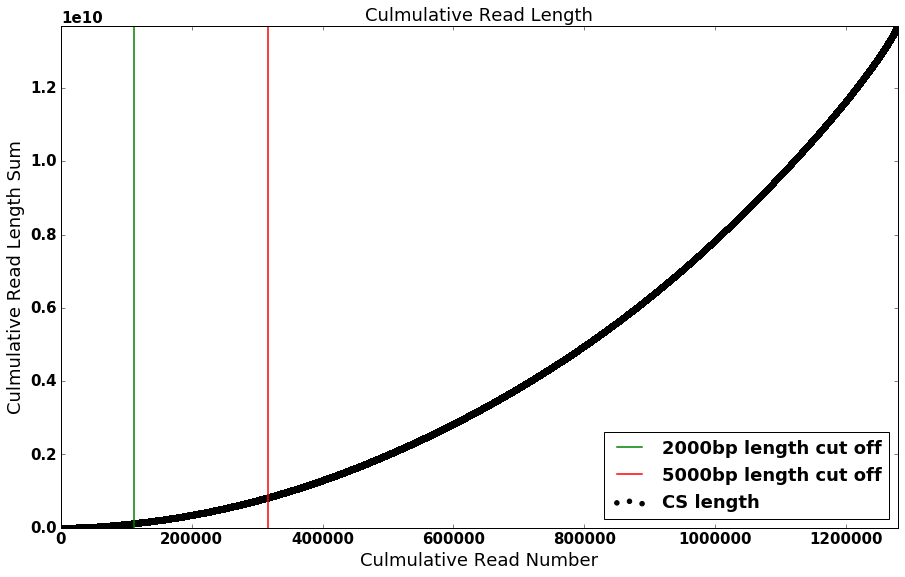

In [13]:
#CS read length plot
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
plt.figure(figsize=(15,9))
plt.scatter(df_all['Numbering'], df_all['CS_length'], c='k', label='CS length')
plt.xlim(-10, len(df_all['CS_length'])+10)
plt.ylim(0, df_all['CS_length'][len(df_all['CS_length'])-1])
plt.xlabel("Culmulative Read Number",**label_config_x)
plt.ylabel("Culmulative Read Length Sum",**label_config_y)
plt.plot((cut_off_2000,cut_off_2000), plt.ylim(), 'g-', lw=1.5, label='2000bp length cut off') #horizonal line
plt.plot((cut_off_5000,cut_off_5000), plt.ylim(), 'r-', lw=1.5, label='5000bp length cut off')
plt.legend(loc=4)
plt.title('Culmulative Read Length')
plt.savefig(file_name+'_CS_plot.tif')
plt.savefig(file_name+'_CS_plot.png')

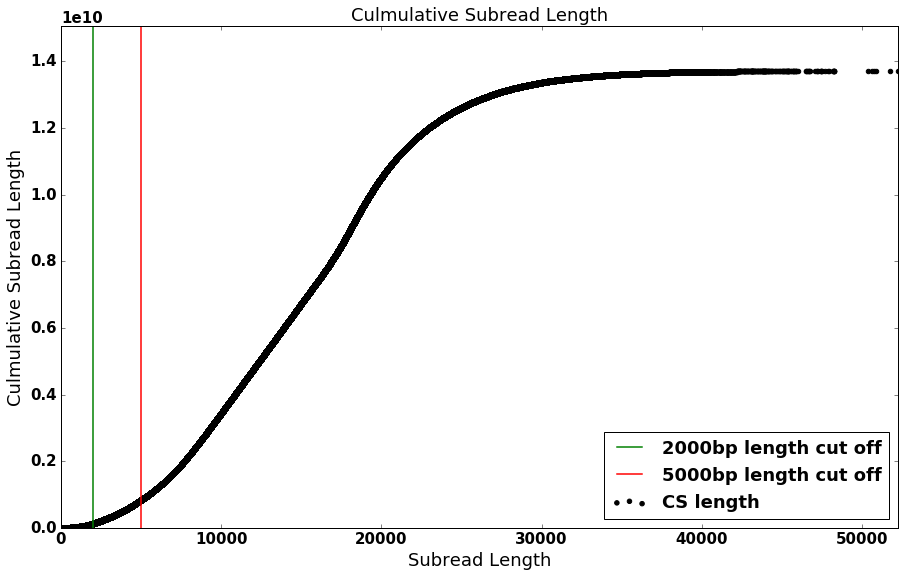

In [15]:
cut_off_2000_2 = list(df_all['read_length'][df_all['read_length'] > 2000])[0]
cut_off_5000_2 = list(df_all['read_length'][df_all['read_length'] > 5000])[0]
#CS read length plot
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font) #changes font of the plot
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
plt.figure(figsize=(15,9))
plt.scatter(df_all['read_length'], df_all['CS_length'], c='k', label='CS length')
plt.xlim(-10, df_all['read_length'][len(df_all['read_length'])-1])
plt.ylim(0, df_all['CS_length'][len(df_all['CS_length'])-1]*1.1)
plt.xlabel("Subread Length",**label_config_x)
plt.ylabel("Culmulative Subread Length",**label_config_y)
plt.plot((cut_off_2000_2,cut_off_2000_2), plt.ylim(), 'g-', lw=1.5, label='2000bp length cut off') #horizonal line
plt.plot((cut_off_5000_2,cut_off_5000_2), plt.ylim(), 'r-', lw=1.5, label='5000bp length cut off')
plt.legend(loc=4)
plt.title('Culmulative Subread Length')
plt.savefig(file_name+'_CS_plot2.tif')
plt.savefig(file_name+'_CS_plot2.png')

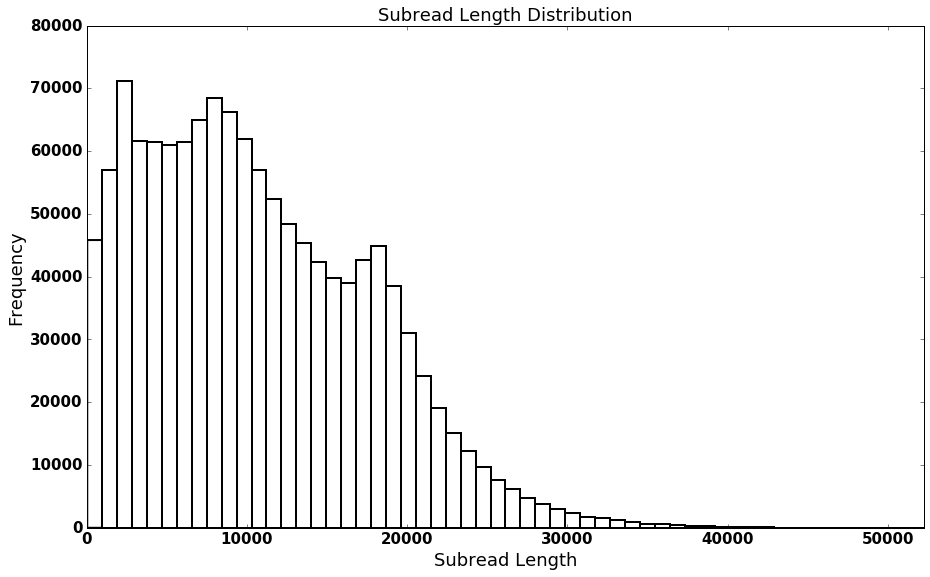

In [16]:
#histogram of 
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
plt.figure(figsize=(15,9))
df_all['read_length'].plot.hist(bins=56, color='w', edgecolor='k', linewidth = 2)
plt.xlim(0, df_all['read_length'][len(df_all['read_length'])-1])
plt.ylabel("Frequency",**label_config_y)
plt.xlabel("Subread Length",**label_config_x)
plt.title('Subread Length Distribution')
plt.savefig(file_name+'_RLD.tif')
plt.savefig(file_name+'_RLD.png')

In [17]:
!pwd

/Users/ben/Documents/work_related/Canberra/RJ_lab_projects/Rust_genome_sequencing/PST79/analysis/PacBio_SCH1743/FastQC_v2
